# データ探索

In [2]:
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い','フレッシュ','渋み','苦味','樽','エキゾチック','粘性']

df = pd.DataFrame(X, columns=variables)
df.head()

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011


# クラスタリング数を求める
何種類のワイン
を置くことにしたかを答えてください。答えるのは2〜20の数字。

## <回答>

エルボー図、シルエット図、樹状図から共通して適していると言えるクラスタリング数を確認、それを答えとする。


### エルボー図

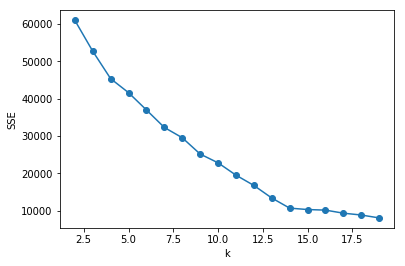

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

plt.plot(range(2,20), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

[考察] クラスタ内誤差平方和がだいたい13以降から変化なし。

### シルエット図
各クラスタのサンプルの凝集度（まとまり具合）を表示して、それぞれを比べる。

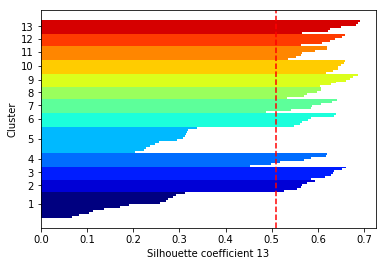

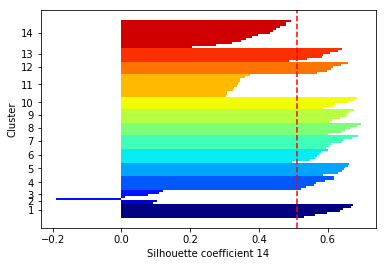

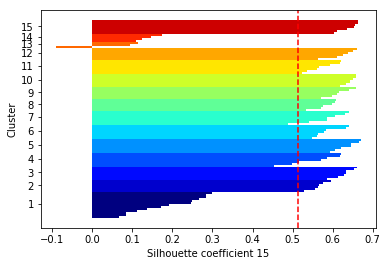

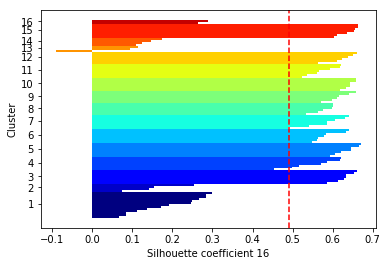

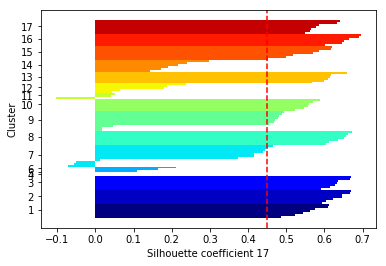

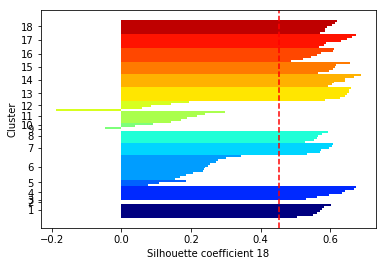

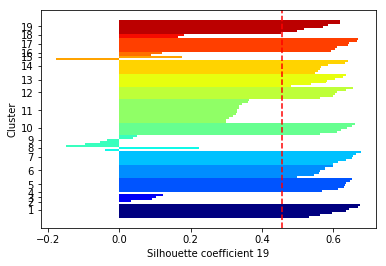

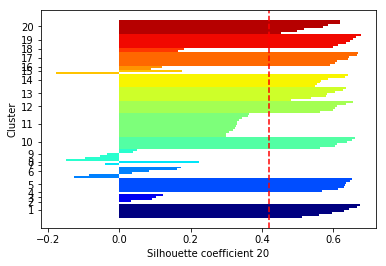

In [4]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

for index in range(13,21):
    km = KMeans(n_clusters=index, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient '+str(index))
    plt.show()

[考察] シルエット図からはクラスタリング数12個以降、図に大きな変化なし。

### 樹状図　（縦軸は距離）

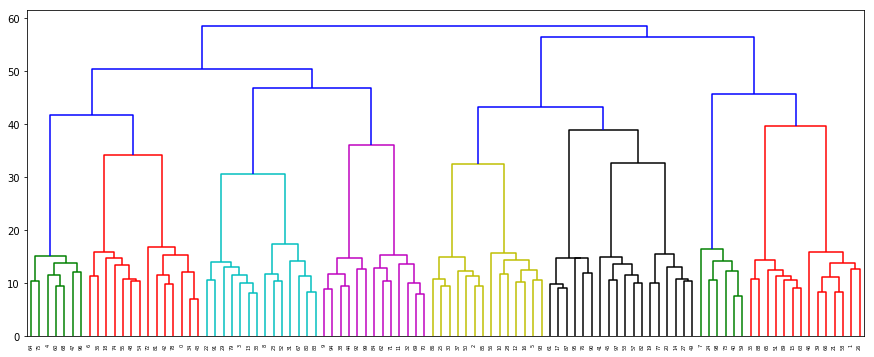

In [22]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 6))
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_dender = dendrogram(row_clusters, labels=name)
plt.show()

[考察] 共通して距離が長い箇所は縦20-40の箇所。今回は、縦20のクラスタリングを分けた場合を採用する。よってクラスタリング数は15個。

## [考察まとめ]

上述より、ワインの種類は15個が理想と判断する。

* * * * 

# 決定木分析

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y_km)
predicted = clf.predict(X)
tree.export_graphviz(clf, out_file="tree.dot",
                         feature_names=variables,
                         class_names=name,
                         filled=True, rounded=True)

__わかること__


- 100種の内の34種が含まれる0番目のクラスタは「透明感があり、果実味が強いワイン」である。そういったものでも、苦味が非常に弱いものは1番目のクラスタである。透明ではない（透明感が0.1346以下の）ワインは0番目のクラスタには1種類も存在しない。

- 100種の内の21種が含まれる4番目のクラスタは「透明感がなくシャープではないワイン」である。

In [ ]:
# コメント

樹状図からクラスタリング数15というのは良さそうですね。
一方でエルボー法から見ると13という考え方もできそうです。